In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [74]:
df = pd.read_csv('../data/participants.tsv', sep='\t')
columns_to_plot = ['religious_now', 'religious_upbringing', 'age', 'education_level', 'sex', 'background_SES']
len(df)

928

In [75]:
# divide 'age', 'education level' and 'background SES' into bins using pd.qcut
df['age_bin'] = pd.qcut(df['age'], q=3)
df['background_SES_bin'] = pd.qcut(df['background_SES'], q=3)
# map bins into numbers
age_bins = list(df['age_bin'].unique())
df['age_bin'] = df['age_bin'].apply(lambda x: age_bins.index(x))
ses_bins = list(df['background_SES_bin'].unique())
df['background_SES_bin'] = df['background_SES_bin'].apply(lambda x: ses_bins.index(x))

In [76]:
df['group'] = df['age_bin'].astype(str) + df['background_SES_bin'].astype(str) + df['education_level'].astype(str) + df['sex'].astype(str)

In [110]:
religious_now_group = df[df['religious_now'] == 'yes']
religious_upbringing_group = df[df['religious_upbringing'] == 'yes']
non_religious_now_group = df[df['religious_now'] == 'no']
non_religious_upbringing_group = df[df['religious_upbringing'] == 'no']
len(religious_now_group), len(religious_upbringing_group), len(non_religious_now_group), len(non_religious_upbringing_group)

(197, 316, 731, 612)

In [111]:
labels = list(religious_now_group['group'].unique())
current_balance = np.zeros(len(labels))
non_religious_now_group = non_religious_now_group[non_religious_now_group['group'].isin(labels)]
religious_dist = religious_now_group['group'].value_counts(sort=False).values

In [112]:
matched_non_religious = []
while(len(matched_non_religious) < len(religious_now_group)):
    subject_found = None
    imbalance_ratio = np.inf
    for _, subject in non_religious_now_group.iterrows():
        class_subject = labels.index(subject['group'])
        current_balance[class_subject] += 1
        if np.abs(current_balance - religious_dist).sum() < imbalance_ratio:
            subject_found = subject
            imbalance_ratio = np.abs(current_balance - religious_dist).sum()
        current_balance[class_subject] -= 1
    class_subject = labels.index(subject_found['group'])
    current_balance[class_subject] += 1
    matched_non_religious.append(subject_found['participant_id'])
    non_religious_now_group = non_religious_now_group[non_religious_now_group['participant_id'] != subject_found['participant_id']]
balanced_non_religious_now_group = df[df['participant_id'].isin(matched_non_religious)]

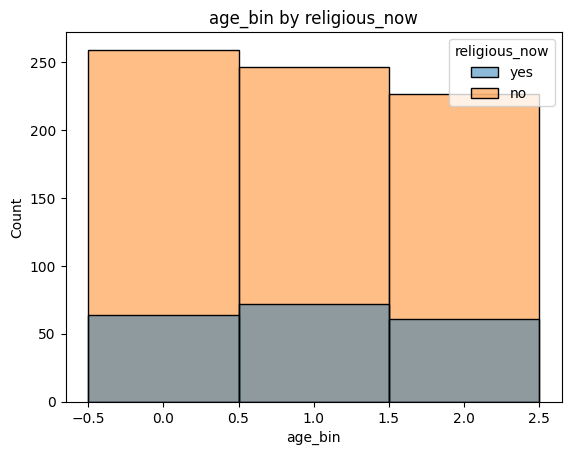

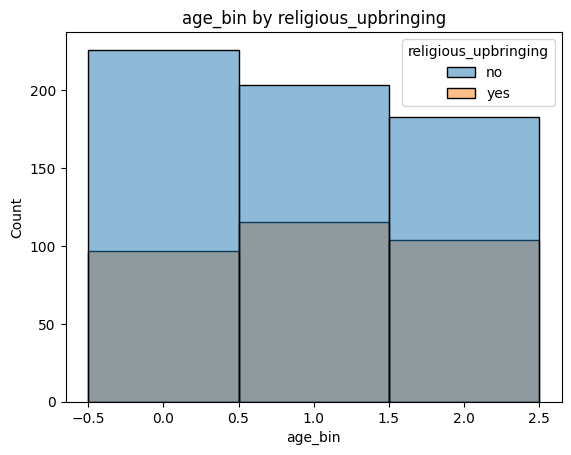

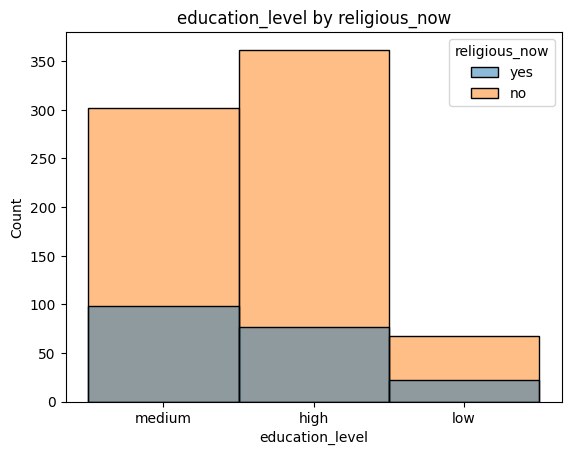

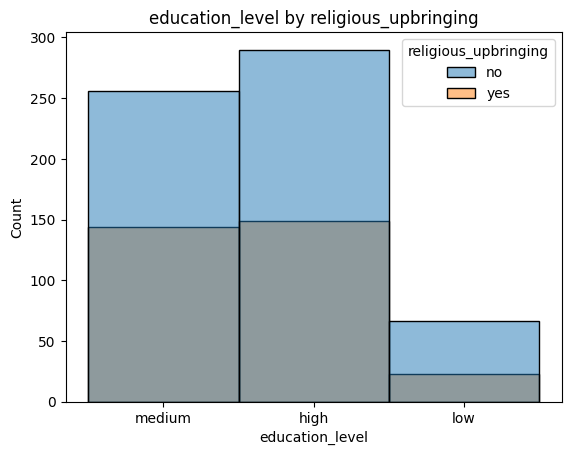

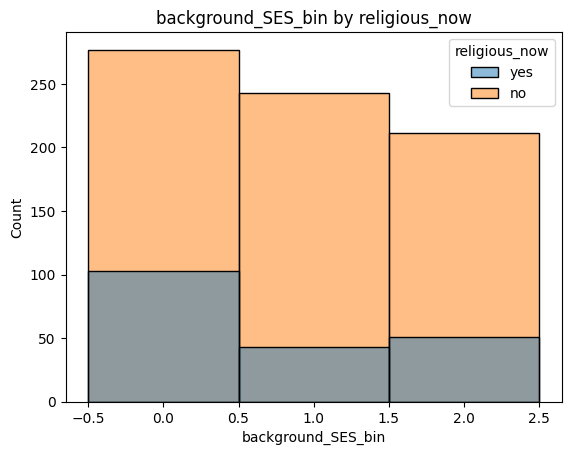

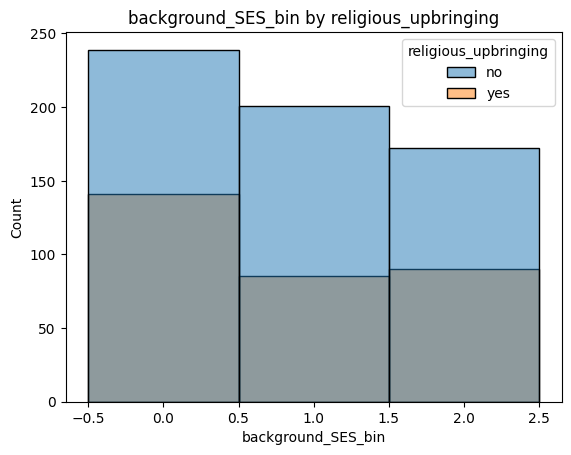

In [61]:
# Make histograms of age, education level, and background SES for each group
columns_to_plot = ['age_bin', 'education_level', 'background_SES_bin']
for col in columns_to_plot:
    fig, ax = plt.subplots()
    sns.histplot(religious_now_group, x=col, hue='religious_now', ax=ax)
    plt.title(f'{col} by religious_now')
    plt.show()

    fig, ax = plt.subplots()
    sns.histplot(df, x=col, hue='religious_upbringing', ax=ax)
    plt.title(f'{col} by religious_upbringing')
    plt.show()

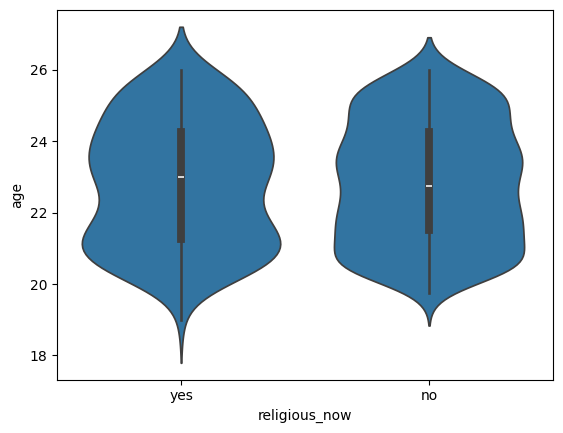

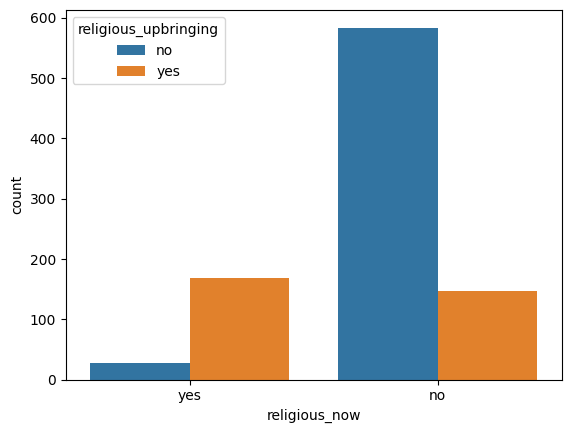

In [13]:
sns.violinplot(x=df['religious_now'], y=df['age'])
plt.show()

sns.countplot(x=df['religious_now'], hue=df['religious_upbringing'])
plt.show()

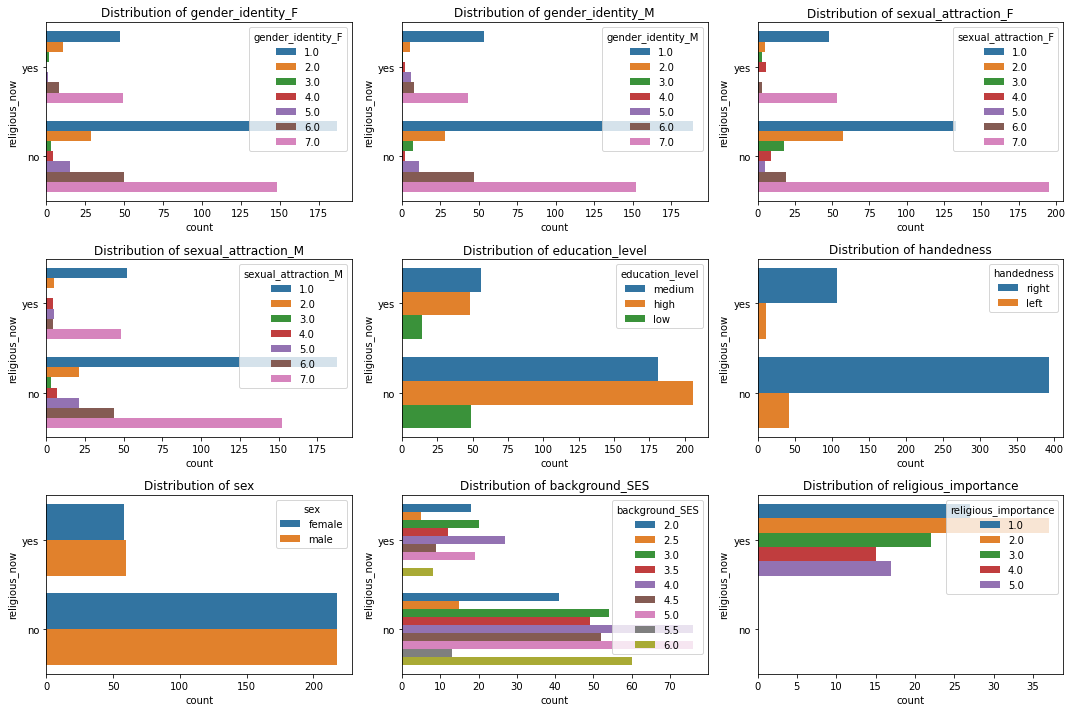

In [4]:
def plot_unbalances(df):
    # Define the columns for visualization
    columns_to_plot = [
        'gender_identity_F', 'gender_identity_M',
        'sexual_attraction_F', 'sexual_attraction_M', 'education_level', 'handedness',
        'sex', 'background_SES', 'religious_importance'
    ]

    # Setting up the plotting area
    plt.figure(figsize=(15, 10))  # Adjust the size as necessary
    num_plots = len(columns_to_plot)
    num_rows = (num_plots // 3) + (num_plots % 3 > 0)

    for index, column in enumerate(columns_to_plot, start=1):
        plt.subplot(num_rows, 3, index)  # Adjust the grid size based on the number of columns
        sns.countplot(y=df['religious_now'], hue=df[column], order=['yes', 'no'])
        plt.title(f'Distribution of {column}')
        plt.tight_layout()

    plt.show()

plot_unbalances(df)

In [5]:
# Exclusion criterias:

# religuous_upbringing == religious_now
df = df[df.religious_upbringing == df.religious_now]

# sexual_attraction and gender_identity as 1 or 7 (avoid cofound with the spectrum)
df = df[df.sexual_attraction_M.isin([1.0, 7.0])]
df = df[df.sexual_attraction_F.isin([1.0, 7.0])]
df = df[df.gender_identity_F.isin([1.0, 7.0])]
df = df[df.gender_identity_M.isin([1.0, 7.0])] 

# plot_unbalances(df)

In [6]:
len(df)

272